## Loan risk assessment and why is it important today ??

Loan analysis is an evaluation method that determines if loans are made on feasible terms and if potential borrowers can and are willing to pay back the loan. It checks the eligibility of the potential borrower against the criteria set forth for lending. Loan analysis gives the creditor a measure of safety on the loan by determining the probability that the borrower will pay back the loan (principal and interest).

**Key points**

1. The proper assessment of credit risk can go a long way in reducing the impact of a lender’s possible loss.
2. Credit risk assessment helps organizations know whether a borrower can pay back a loan.
3. If a borrower’s credit risk is high, their loan’s interest rate will be increased.


### Problem Statement

Analyze the datasets provided in a Credit EDA analysis and assist the bank with most important driver factors to approve or refuse a loan request from the borrorwers by understanding the various patterns drawn from the datasets and representing the outcomes in the visual presentations.

### Importing necessary libraries 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [2]:
# to display all the columns
pd.set_option('display.max_columns', 200) 

# to display all the rows
pd.set_option('display.max_rows', 200) 

### Importing Data Files

In [3]:
#importing previous_application data file 
previousApplication = pd.read_csv('previous_application.csv')

#importing application_data file 
currentApplication=pd.read_csv('application_data.csv')

In [4]:
previousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
currentApplication.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Shape

In [6]:
#to check the data structure (# of rows and columns)
print(currentApplication.shape)

print(previousApplication.shape)

(307511, 122)
(1670214, 37)


### Info

In [7]:
currentApplication.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
previousApplication.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Data types in current application:
- float64 (65)
- int64 (41)
- object (16)

#### Data types in previous application:
- float64 (15)
- int64 (6)
- object (16)

### Describe

In [9]:
#for numerical datatype
previousApplication.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [10]:
#for categorical datatype
previousApplication.describe(include=object).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118
FLAG_LAST_APPL_PER_CONTRACT,1670214,2,Y,1661739
NAME_CASH_LOAN_PURPOSE,1670214,25,XAP,922661
NAME_CONTRACT_STATUS,1670214,4,Approved,1036781
NAME_PAYMENT_TYPE,1670214,4,Cash through the bank,1033552
CODE_REJECT_REASON,1670214,9,XAP,1353093
NAME_TYPE_SUITE,849809,7,Unaccompanied,508970
NAME_CLIENT_TYPE,1670214,4,Repeater,1231261
NAME_GOODS_CATEGORY,1670214,28,XNA,950809


### Data Cleaning for null values

In [11]:
#function to calculate null value percentage in a dataframe
def nullValuePer(df):
    null_perc_series=round((df.isnull().mean()*100),4).sort_values(ascending=False)
    nullPerc=pd.DataFrame({'Column_Name':null_perc_series.index,'Percentage':null_perc_series.values})
    return nullPerc

In [12]:
# null value percentage (>0) in columns of previous application data
null_prev=nullValuePer(previousApplication)
null_prev[null_prev['Percentage']>0]

,Column_Name,Percentage
0,RATE_INTEREST_PRIVILEGED,99.6437
1,RATE_INTEREST_PRIMARY,99.6437
2,AMT_DOWN_PAYMENT,53.6365
3,RATE_DOWN_PAYMENT,53.6365
4,NAME_TYPE_SUITE,49.1198
5,NFLAG_INSURED_ON_APPROVAL,40.2981
6,DAYS_TERMINATION,40.2981
7,DAYS_LAST_DUE,40.2981
8,DAYS_LAST_DUE_1ST_VERSION,40.2981
9,DAYS_FIRST_DUE,40.2981


#### Comment:
In the following Columns, percentage of null values is very high. Hence these columns can be removed from previous dataset:
- RATE_INTEREST_PRIVILEGED	
- RATE_INTEREST_PRIMARY
- The column SK_ID_PREV is not required for analysis purpose 

In [13]:
#Dropping columns from previous application data
previousApplication.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','SK_ID_PREV'],inplace=True,axis=1)

In the following Rows, percentage of missing values is less than 1%. Hence these rows can be removed from previous dataset:
- PRODUCT_COMBINATION	
- AMT_CREDIT	

In [14]:
#Dropping rows from previous application data
previousApplication.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'],inplace=True,axis=0)

In [15]:
previousApplication.shape

(1669867, 34)

In [16]:
# null value percentage (>0) in previous application columns
null_prev=nullValuePer(previousApplication)
null_prev[null_prev['Percentage']>0]

,Column_Name,Percentage
0,RATE_DOWN_PAYMENT,53.6268
1,AMT_DOWN_PAYMENT,53.6268
2,NAME_TYPE_SUITE,49.1092
3,DAYS_TERMINATION,40.2857
4,DAYS_LAST_DUE,40.2857
5,DAYS_LAST_DUE_1ST_VERSION,40.2857
6,DAYS_FIRST_DUE,40.2857
7,DAYS_FIRST_DRAWING,40.2857
8,NFLAG_INSURED_ON_APPROVAL,40.2857
9,AMT_GOODS_PRICE,23.0658


### Merging previous application and current application Datasets and analyse defaults

In [17]:
#merging current and previous application dataset
prev_merged=pd.merge(currentApplication[['SK_ID_CURR','TARGET']],previousApplication,how='inner',on=['SK_ID_CURR'])
prev_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [18]:
prev_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413387 entries, 0 to 1413386
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413387 non-null  int64  
 1   TARGET                       1413387 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413387 non-null  object 
 3   AMT_ANNUITY                  1106482 non-null  float64
 4   AMT_APPLICATION              1413387 non-null  float64
 5   AMT_CREDIT                   1413387 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413387 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413387 non-null  int64  
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [19]:
prev_merged.shape

(1413387, 35)

In [20]:
#Percentage of null values in merged dataset
null_prev=nullValuePer(prev_merged)
null_prev[null_prev['Percentage']>0]

,Column_Name,Percentage
0,AMT_DOWN_PAYMENT,53.0093
1,RATE_DOWN_PAYMENT,53.0093
2,NAME_TYPE_SUITE,49.1272
3,NFLAG_INSURED_ON_APPROVAL,39.6772
4,DAYS_TERMINATION,39.6772
5,DAYS_LAST_DUE,39.6772
6,DAYS_LAST_DUE_1ST_VERSION,39.6772
7,DAYS_FIRST_DUE,39.6772
8,DAYS_FIRST_DRAWING,39.6772
9,AMT_GOODS_PRICE,22.5848


## User defined functions for data visualization

### Set Title

In [21]:
def set_title(title):
    plt.title(title,fontdict={'fontsize': 17, 'fontweight' : 5, 'color' : 'Black'})

### Set Axis Label

In [22]:
def set_label(axis,label):
    if axis=='x':
        plt.xlabel(label, fontdict={'fontsize': 13, 'fontweight' : 5, 'color' : 'DarkRed'})
    elif axis=='y':
        plt.ylabel(label, fontdict={'fontsize': 13, 'fontweight' : 5, 'color' : 'DarkRed'})
    else:
        print('Invalid axis')

### Countplot

In [23]:
def countplot(df,column,hue):
#    plt.figure(figsize=(11,6))
    if hue!=None:
        sns.countplot(df[column],hue=df[hue])
        plt.legend(['Non-Defaulters','Defaulters'],fontsize=11,loc='upper right')
    else:
        sns.countplot(df[column])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    set_label('x',column.capitalize())
    set_label('y','Count');

### Boxplot

In [24]:
def boxplot(df,column):
    sns.boxplot(df[column])
    plt.xticks(fontsize=12)
    set_label('x',column);

### Scatterplot

In [25]:
def scatterplot(df1,df2,col1,col2,hue,value):
    sns.scatterplot(df1[df1[hue]==value][col1],df2[df2[hue]==value][col2])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    set_label('x',col1)
    set_label('y',col2);

### Distplot

In [26]:
def distplot(df,column,hue,value):
    sns.distplot(df[df[hue]==value][column],bins=8)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    set_label('x',column)
    set_label('y','Frequency');

### Function to calculate defaults percentage

In [27]:
def defaulters_perc(df,column_name):
    def_per=pd.DataFrame(columns=[column_name,'Default_Percentage'])
    for i in df[column_name].unique():
        perc=df[ (df[column_name]==i) & (df['TARGET']==1)].shape[0]*100/df[df[column_name]==i].shape[0]
        def_per=def_per.append({column_name:i,'Default_Percentage':round(perc,2)},ignore_index=True)
    return def_per.sort_values(by='Default_Percentage',ascending=False)

### Data imbalance check

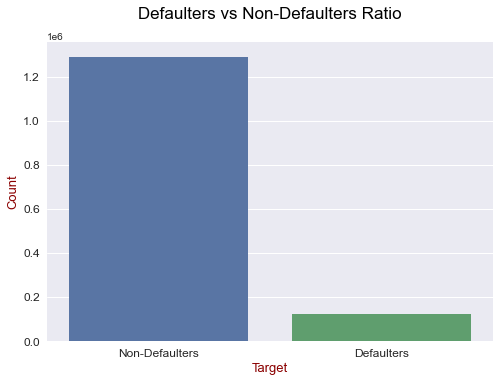

In [28]:
#countplot to visualize defaulters vs non-defaulters ratio
countplot(prev_merged,'TARGET',None)
set_title('Defaulters vs Non-Defaulters Ratio\n')
plt.xticks(ticks=[0,1],labels=['Non-Defaulters','Defaulters']);

In [29]:
#to calculate percentage values of defaulters and non-defaulters
print('Percentage of Defaulters: ',round(prev_merged[prev_merged['TARGET']==1].shape[0]*100/prev_merged.shape[0],2))
print('Percentage of Non-Defaulters: ',round(prev_merged[prev_merged['TARGET']==0].shape[0]*100/prev_merged.shape[0],2))

Percentage of Defaulters:  8.65
Percentage of Non-Defaulters:  91.35


**Inference**

Since there are less number of defaulters, it is clear that Data is imbalanced with a percentage of 9.

### Defaulters for each loan type

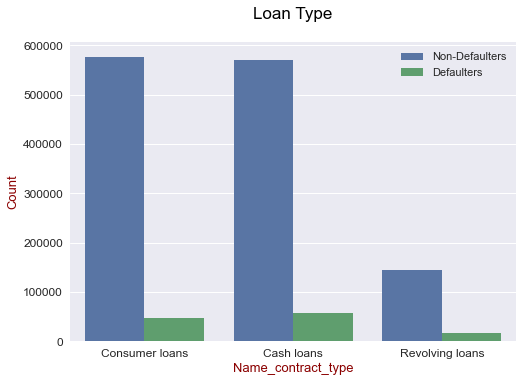

In [30]:
countplot(prev_merged,'NAME_CONTRACT_TYPE','TARGET')
set_title('Loan Type\n');

In [31]:
#calculating defaults percentage in Name_contract_type
defaulters_perc(prev_merged,'NAME_CONTRACT_TYPE')

,NAME_CONTRACT_TYPE,Default_Percentage
2,Revolving loans,10.47
1,Cash loans,9.13
0,Consumer loans,7.71


**Inference**

- On a general count, where countplot is derived, Consumer loans have maximum successful recovery whereas cash loans stands at maximum defaults.
- Secondly, when compared the individual loan type with its own total count, we can notice that revolving loans stands at maximum defaults.

### Status check

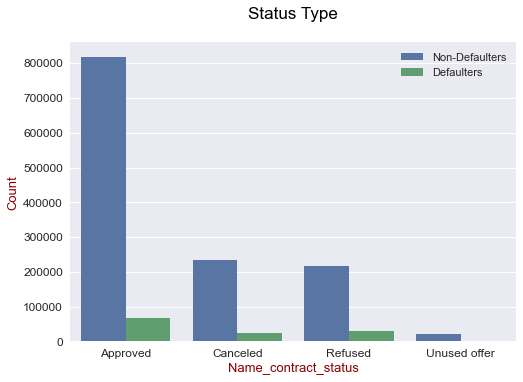

In [32]:
countplot(prev_merged,'NAME_CONTRACT_STATUS','TARGET')
set_title('Status Type\n');

In [33]:
#calculating defaults percentage in Name_contract_status
defaulters_perc(prev_merged,'NAME_CONTRACT_STATUS')

,NAME_CONTRACT_STATUS,Default_Percentage
2,Refused,11.99
1,Canceled,9.16
3,Unused offer,8.25
0,Approved,7.59


In [34]:
#percentage of previously approved loans that defaulted in current loan
total_approved=prev_merged[prev_merged['NAME_CONTRACT_STATUS']=='Approved'].shape[0]
approved_def_per=prev_merged[(prev_merged['NAME_CONTRACT_STATUS']=='Approved') & (prev_merged['TARGET']==1)].shape[0]*100/total_approved
print("Percentage of previously approved loans that defaulted in current loan: ",round(approved_def_per,2))

Percentage of previously approved loans that defaulted in current loan:  7.59


In [35]:
#percentage of previously refused loans that were able to pay current loan
total_refused=prev_merged[prev_merged['NAME_CONTRACT_STATUS']=='Refused'].shape[0]
refused_ndef_per=prev_merged[(prev_merged['NAME_CONTRACT_STATUS']=='Refused')&(prev_merged['TARGET']==0)].shape[0]*100/total_refused
print("Percentage of previously refused loans that were able to pay current loan: ",round(refused_ndef_per,2))

Percentage of previously refused loans that were able to pay current loan:  88.01


**Inference**

- On a general count, where countplot is derived on various statuses of loan, approved status contribute for maximum defaults.
- Secondly, when compared the individual loan status with its own total count, it can be observed that refused status stands first.
- Its clear with percentage derived above on refused loans, that a loan application can't be rejected on the basis of previous performace.

### Defaults amongst Goods

Excluding unknown goods category, let us find out the maximum contributors to defaults

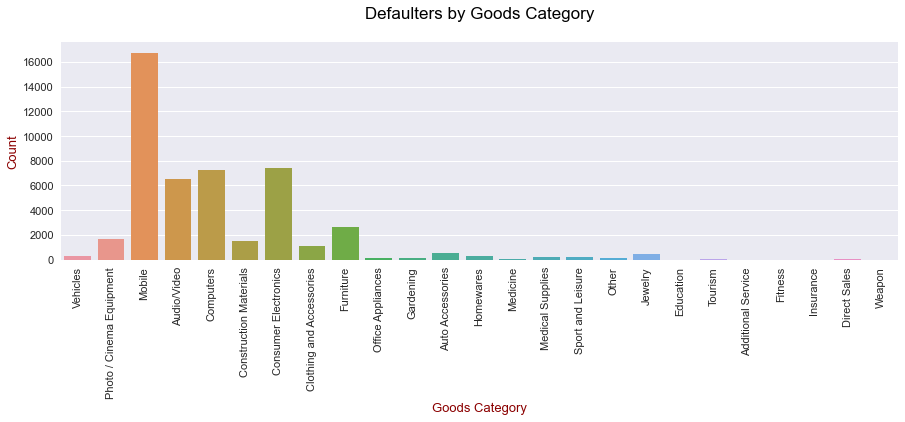

In [36]:
plt.figure(figsize=(15,4))

set_title('Defaulters by Goods Category\n')
sns.countplot(prev_merged[(prev_merged['TARGET']==1)&(prev_merged['NAME_GOODS_CATEGORY']!='XNA')]['NAME_GOODS_CATEGORY'])

plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=11)

set_label('x','Goods Category')
set_label('y',"Count");

In [37]:
#calculating defaults percentage in Name_goods_category
defaulters_perc(prev_merged,'NAME_GOODS_CATEGORY')

,NAME_GOODS_CATEGORY,Default_Percentage
23,Insurance,10.34
0,Vehicles,10.06
1,XNA,9.38
17,Auto Accessories,9.07
14,Jewelry,9.04
4,Mobile,8.65
15,Office Appliances,8.26
21,Direct Sales,8.18
9,Computers,8.10
20,Weapon,7.69


**Inferences**

- Technology related goods such as Mobile, Consumer Electronics, Computers and Audio/Video holds the highest defaults with total population.
- When observed with same type count percentage, its the other way around. Automobiles category defaulted more.

### Defaults amongst seller industry

Excluding unknown seller industry category, let us find out maximum sellers who defaulted.

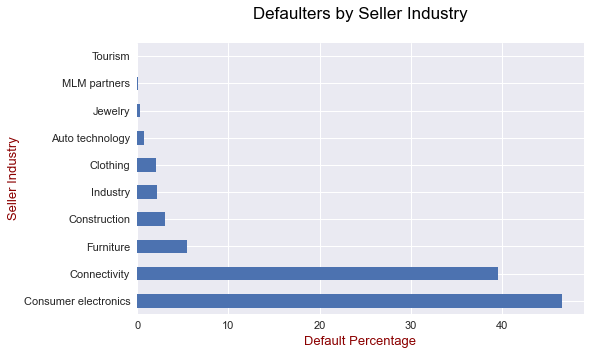

In [38]:
plt.figure(figsize=(8,5))

set_title('Defaulters by Seller Industry\n')
prev_merged[(prev_merged['TARGET']==1)&(prev_merged['NAME_SELLER_INDUSTRY']!='XNA')]['NAME_SELLER_INDUSTRY'].value_counts(normalize=True).plot.barh()

plt.xticks(ticks=[0.0,0.1,0.2,0.3,0.4],labels=['0','10','20','30','40'],fontsize=11)
plt.yticks(fontsize=11)

set_label('x','Default Percentage')
set_label('y','Seller Industry');

In [39]:
#calculating defaults percentage in Name_seller_industry
defaulters_perc(prev_merged,'NAME_SELLER_INDUSTRY')

,NAME_SELLER_INDUSTRY,Default_Percentage
0,Auto technology,10.37
1,XNA,9.36
4,Connectivity,9.19
9,Jewelry,8.88
3,Consumer electronics,7.55
7,Industry,7.21
5,Construction,6.57
10,MLM partners,6.19
2,Furniture,6.12
6,Clothing,5.72


**Inferences**

- Electronic seller industries holds the highest defaults with total population.
- When observed with same type count percentage, its Auto-technology which stands high.

### Defaulters, non-insured !!

In [40]:
#Percentage of null values in merged dataset
null_prev=nullValuePer(prev_merged)
null_prev[null_prev['Percentage']>0]

,Column_Name,Percentage
0,AMT_DOWN_PAYMENT,53.0093
1,RATE_DOWN_PAYMENT,53.0093
2,NAME_TYPE_SUITE,49.1272
3,NFLAG_INSURED_ON_APPROVAL,39.6772
4,DAYS_TERMINATION,39.6772
5,DAYS_LAST_DUE,39.6772
6,DAYS_LAST_DUE_1ST_VERSION,39.6772
7,DAYS_FIRST_DUE,39.6772
8,DAYS_FIRST_DRAWING,39.6772
9,AMT_GOODS_PRICE,22.5848


The column NFLAG_INSURED_ON_APPROVAL has around 39% null values. Hence, let's replace it with 'Unknown'.

In [41]:
prev_merged.NFLAG_INSURED_ON_APPROVAL.fillna('Unknown',axis=0,inplace=True)

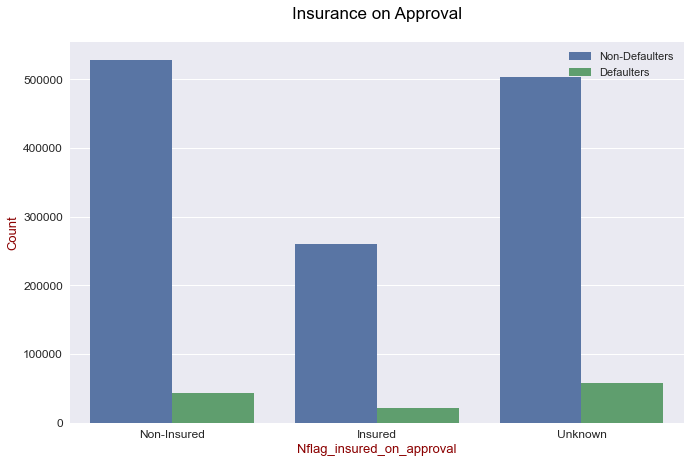

In [42]:
plt.figure(figsize=(11,7))
countplot(prev_merged,'NFLAG_INSURED_ON_APPROVAL','TARGET')
set_title('Insurance on Approval\n')
plt.xticks(ticks=[0.0,1.0,2.0],labels=['Non-Insured','Insured','Unknown']);

In [43]:
#calculating defaults percentage in Nflag_insured_on_approval
defaulters_perc(prev_merged,'NFLAG_INSURED_ON_APPROVAL')

,NFLAG_INSURED_ON_APPROVAL,Default_Percentage
2,Unknown,10.27
1,1.0,7.61
0,0.0,7.58


**Inference**

It is really important to insure a loan disbursed to borrowers to reduce the default precentage.

### Loan Rejection Reason

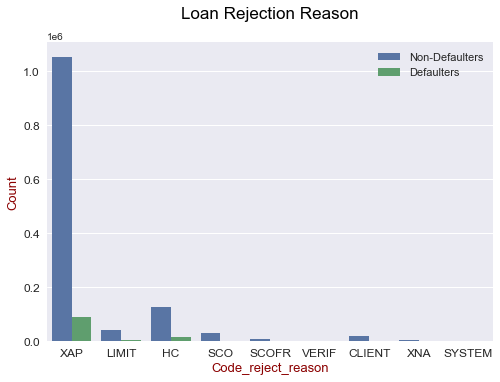

In [44]:
countplot(prev_merged,'CODE_REJECT_REASON','TARGET')
set_title('Loan Rejection Reason\n');

In [45]:
#calculating defaults percentage in Code_reject_reason
defaulters_perc(prev_merged,'CODE_REJECT_REASON')

,CODE_REJECT_REASON,Default_Percentage
4,SCOFR,20.93
1,LIMIT,12.56
2,HC,11.73
7,XNA,10.10
3,SCO,10.00
5,VERIF,9.26
6,CLIENT,8.25
0,XAP,7.94
8,SYSTEM,6.25


**Inference**

LIMIT and HC code rejection reasons are at top three on both genral count as well as individual population type.

### Channel Type

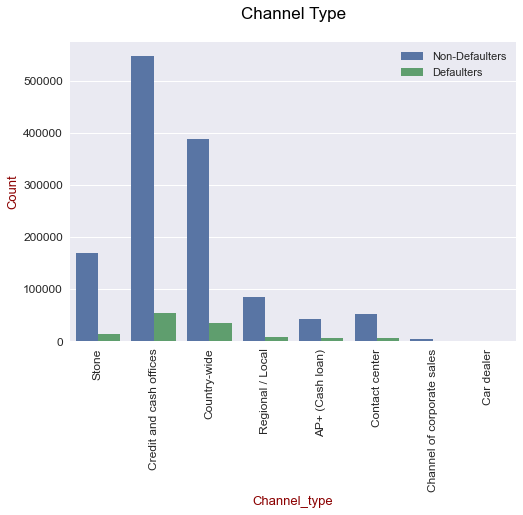

In [46]:
countplot(prev_merged,'CHANNEL_TYPE','TARGET')
set_title('Channel Type\n')
plt.xticks(rotation=90);

In [47]:
#calculating defaults percentage in Channel_type
defaulters_perc(prev_merged,'CHANNEL_TYPE')

,CHANNEL_TYPE,Default_Percentage
4,AP+ (Cash loan),12.82
5,Contact center,10.27
1,Credit and cash offices,9.01
2,Country-wide,8.25
3,Regional / Local,7.61
0,Stone,7.37
6,Channel of corporate sales,6.38
7,Car dealer,5.17


**Inference**

- Credit and cash offices channel type are higher in general count analysis.
- AP+ (Cash Loan) and Contact center are highest amongst individual population perspective.
- Car dealer channel type remains at low profile in both the comparison for defaulters.

### Payment Type

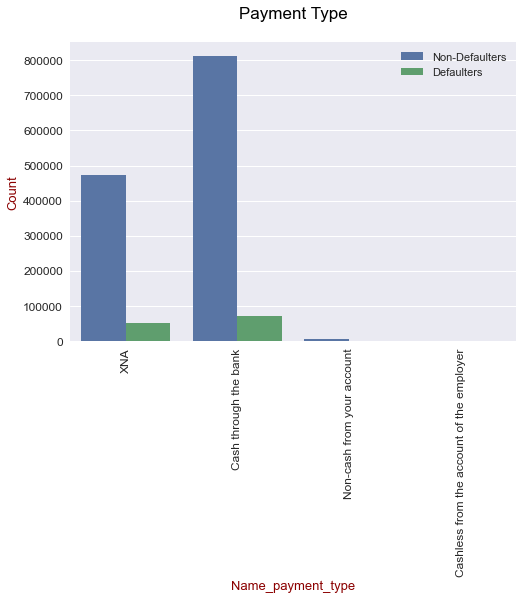

In [48]:
countplot(prev_merged,'NAME_PAYMENT_TYPE','TARGET')
set_title('Payment Type\n')
plt.xticks(rotation=90);

In [49]:
#calculating defaults percentage in Name_payment_type
defaulters_perc(prev_merged,'NAME_PAYMENT_TYPE')

,NAME_PAYMENT_TYPE,Default_Percentage
0,XNA,9.62
2,Non-cash from your account,8.21
1,Cash through the bank,8.09
3,Cashless from the account of the employer,8.08


**Inference**

Cashless from the account of the employer is a most safest mode of payment and has least defaulters in both comparison.

### No. of applications in a week

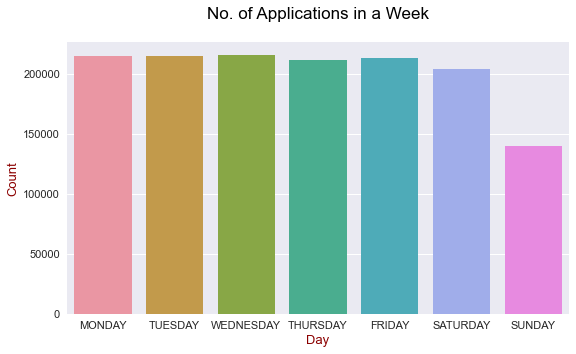

In [50]:
plt.figure(figsize=(9,5))
day_order = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
sns.countplot(prev_merged['WEEKDAY_APPR_PROCESS_START'],order=day_order)
set_title('No. of Applications in a Week\n')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

set_label("x","Day")
set_label("y","Count");

In [51]:
defaulters_perc(prev_merged,'WEEKDAY_APPR_PROCESS_START')

,WEEKDAY_APPR_PROCESS_START,Default_Percentage
3,THURSDAY,8.89
5,MONDAY,8.86
4,TUESDAY,8.76
1,FRIDAY,8.75
6,WEDNESDAY,8.70
0,SATURDAY,8.34
2,SUNDAY,8.05


**Inference**

- Percentage of Defaulters' applications received are nearly same each day of the week.
- On a total count, sunday has received lesser application compared to weekdays.

### Product Type

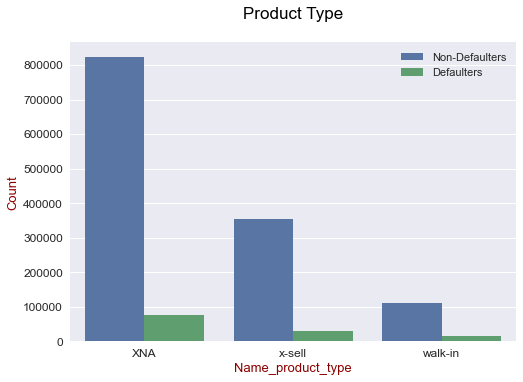

In [52]:
countplot(prev_merged,'NAME_PRODUCT_TYPE','TARGET')
set_title('Product Type\n')

In [53]:
defaulters_perc(prev_merged,'NAME_PRODUCT_TYPE')

,NAME_PRODUCT_TYPE,Default_Percentage
2,walk-in,12.47
0,XNA,8.35
1,x-sell,8.09


**Inference**

- **X-sell** (parallelly offered loan when bought other products by client) is more defaulted when compared to **Walk-in** as per total count.
- Its the other way that, Walk-in contributes more to defaulters when compared with same population count.

### Yield Group

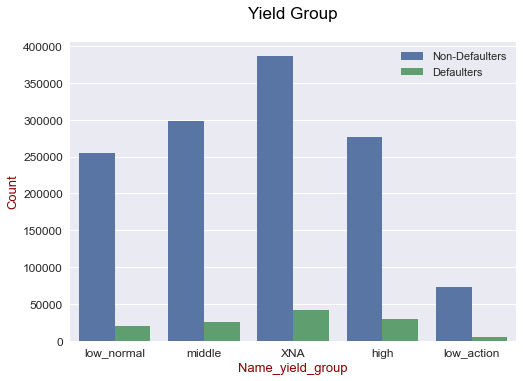

In [54]:
countplot(prev_merged,'NAME_YIELD_GROUP','TARGET')
set_title('Yield Group\n')

In [55]:
defaulters_perc(prev_merged,'NAME_YIELD_GROUP')

,NAME_YIELD_GROUP,Default_Percentage
2,XNA,9.86
3,high,9.55
1,middle,8.04
0,low_normal,7.13
4,low_action,6.45


**Inference**

Both high and middle grouped interest categories have same defaulters in both general and individual population count analysis.

### Portfolio

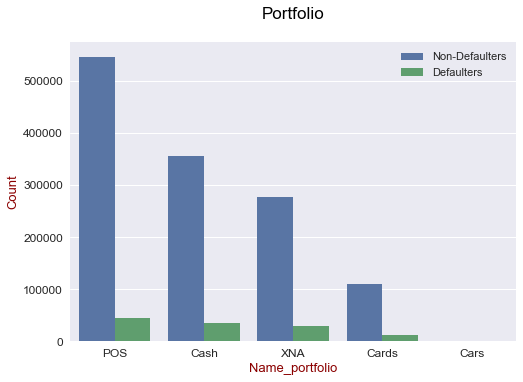

In [56]:
countplot(prev_merged,'NAME_PORTFOLIO','TARGET')
set_title('Portfolio\n');

In [57]:
defaulters_perc(prev_merged,'NAME_PORTFOLIO')

,NAME_PORTFOLIO,Default_Percentage
3,Cards,10.16
2,XNA,9.73
1,Cash,8.88
0,POS,7.64
4,Cars,5.53


**Inference**

- POS (retailer offered loan at point of purchase) has more defaulters when compared to other portfolio on general count.
- Cards (third party offered loan at point of purchase) has more defaulters when compared to other portfolio on individual count.

### Credit vs Down Payment

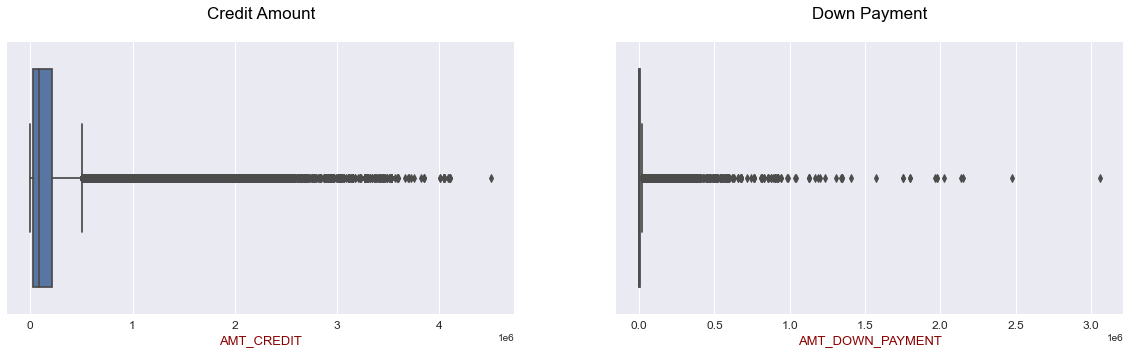

In [58]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = boxplot(prev_merged,'AMT_CREDIT')
set_title('Credit Amount\n')

plt.subplot(1,2,2)
ax = boxplot(prev_merged,'AMT_DOWN_PAYMENT')
set_title('Down Payment\n');


Its clear from above subplots that the outliers exists in both credit and down payment attributes. Lets treat it with percentile approach.

In [59]:
amt_credit = prev_merged[prev_merged['AMT_CREDIT']<np.nanpercentile(prev_merged['AMT_CREDIT'],99)]
amt_down_payment = prev_merged[prev_merged['AMT_DOWN_PAYMENT']<np.nanpercentile(prev_merged['AMT_DOWN_PAYMENT'],99)]

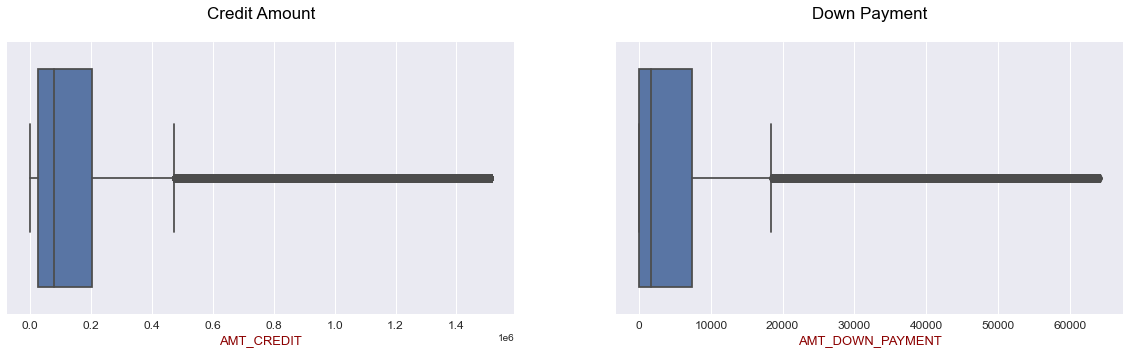

In [60]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = boxplot(amt_credit,'AMT_CREDIT')
set_title('Credit Amount\n')

plt.subplot(1,2,2)
ax = boxplot(amt_down_payment,'AMT_DOWN_PAYMENT')
set_title('Down Payment\n');

With the continuous variables above, we can proceed mapping with scatter plot.

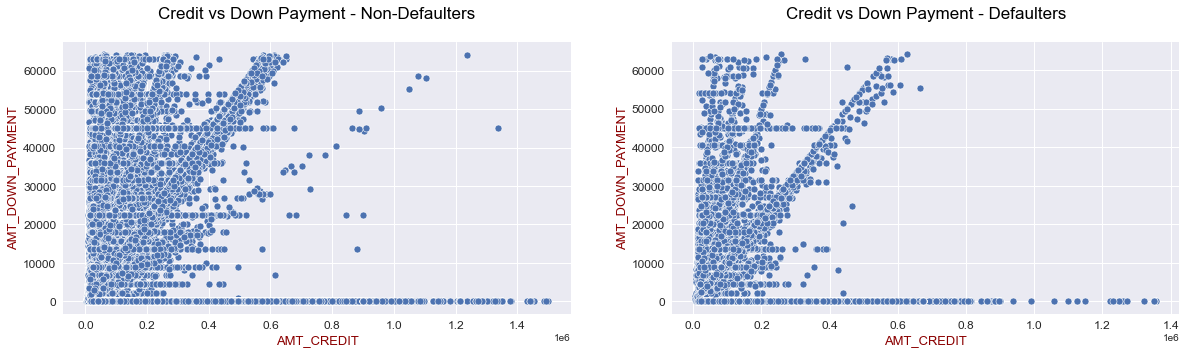

In [61]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax=scatterplot(amt_credit,amt_down_payment,'AMT_CREDIT','AMT_DOWN_PAYMENT','TARGET',0)
set_title('Credit vs Down Payment - Non-Defaulters\n')

plt.subplot(1,2,2)
ax=scatterplot(amt_credit,amt_down_payment,'AMT_CREDIT','AMT_DOWN_PAYMENT','TARGET',1)
set_title('Credit vs Down Payment - Defaulters\n');


**Inferences**

- Number of defaulters are less for larger amount of credit.
- For higher downpayment, defaulters are less.

## Analysis of Current Application Dataset

In [62]:
currentApplication.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Describe

In [63]:
#for numerical datatype
currentApplication.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [64]:
#for categorical datatype
currentApplication.describe(include=object).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


### Data cleaning for null values

In [65]:
# missing value percentage (>0) in columns of previous application data
null_app=nullValuePer(currentApplication)
null_app[null_app['Percentage']>0]

,Column_Name,Percentage
0,COMMONAREA_MEDI,69.8723
1,COMMONAREA_AVG,69.8723
2,COMMONAREA_MODE,69.8723
3,NONLIVINGAPARTMENTS_MODE,69.4330
4,NONLIVINGAPARTMENTS_AVG,69.4330
5,NONLIVINGAPARTMENTS_MEDI,69.4330
6,FONDKAPREMONT_MODE,68.3862
7,LIVINGAPARTMENTS_MODE,68.3550
8,LIVINGAPARTMENTS_AVG,68.3550
9,LIVINGAPARTMENTS_MEDI,68.3550


#### Rows to be removed

In the following Rows, percentage of missing values is less than 1%. Hence these rows can be removed from application dataset:
- CNT_FAM_MEMBERS
- AMT_ANNUITY	
- AMT_GOODS_PRICE
- NAME_TYPE_SUITE		

In [66]:
#Dropping rows having null values from application data
currentApplication.dropna(subset=['CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE'],inplace=True,axis=0)

#### Columns to be removed
Removing columns for which percentage of missing values is more than 50%.

In [67]:
drop_col=list(null_app[null_app['Percentage']>50]['Column_Name'])

In [68]:
#Dropping columns having null values from application data
currentApplication.drop(drop_col,inplace=True,axis=1)

In [69]:
#Calculating percentage of null values in application data
null_app=nullValuePer(currentApplication)
null_app[null_app['Percentage']>0]

,Column_Name,Percentage
0,FLOORSMAX_AVG,49.7752
1,FLOORSMAX_MODE,49.7752
2,FLOORSMAX_MEDI,49.7752
3,YEARS_BEGINEXPLUATATION_AVG,48.7957
4,YEARS_BEGINEXPLUATATION_MODE,48.7957
5,YEARS_BEGINEXPLUATATION_MEDI,48.7957
6,TOTALAREA_MODE,48.2830
7,EMERGENCYSTATE_MODE,47.4120
8,OCCUPATION_TYPE,31.3533
9,EXT_SOURCE_3,19.8395


### Shape

In [70]:
currentApplication.shape

(306207, 81)

In [71]:
currentApplication.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Gender

In [72]:
currentApplication.CODE_GENDER.value_counts()

F      201635
M      104568
XNA         4
Name: CODE_GENDER, dtype: int64

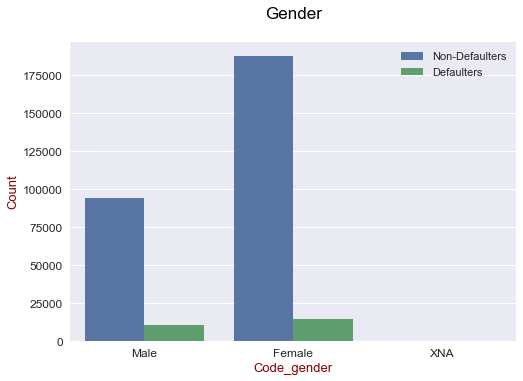

In [73]:
countplot(currentApplication,'CODE_GENDER','TARGET')
set_title('Gender\n')
plt.xticks(ticks=[0,1,2],labels=['Male','Female','XNA']);

In [74]:
defaulters_perc(currentApplication,'CODE_GENDER')

,CODE_GENDER,Default_Percentage
0,M,10.17
1,F,7.00
2,XNA,0.00


**Inference**

- As per total count and population analysis, female applicants seems to be higher in default zone.
- When compared with same gender count, its 3% more for male applicants who are likely to default.
- Overall, female count of applicants are more in dataset.

### Occupation type

In [75]:
#calculating percentage of null values in application data
null_app=nullValuePer(currentApplication)
null_app[null_app['Percentage']>0]

,Column_Name,Percentage
0,FLOORSMAX_AVG,49.7752
1,FLOORSMAX_MODE,49.7752
2,FLOORSMAX_MEDI,49.7752
3,YEARS_BEGINEXPLUATATION_AVG,48.7957
4,YEARS_BEGINEXPLUATATION_MODE,48.7957
5,YEARS_BEGINEXPLUATATION_MEDI,48.7957
6,TOTALAREA_MODE,48.2830
7,EMERGENCYSTATE_MODE,47.4120
8,OCCUPATION_TYPE,31.3533
9,EXT_SOURCE_3,19.8395


The column OCCUPATION_TYPE has around 31% null values. Hence, we have replaced null values with value 'Unknown'

In [76]:
currentApplication.OCCUPATION_TYPE.fillna('Unknown',axis=0,inplace=True)

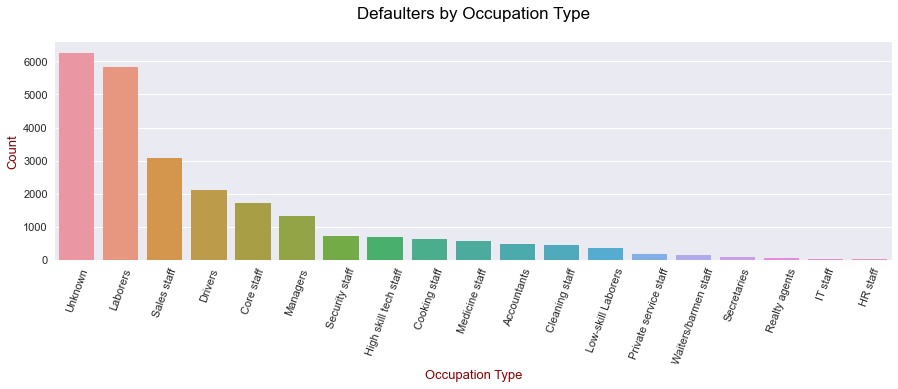

In [77]:
plt.figure(figsize=(15,4))

sns.countplot(currentApplication[(currentApplication['TARGET']==1)]['OCCUPATION_TYPE'],
              order=currentApplication[(currentApplication['TARGET']==1)]['OCCUPATION_TYPE'].value_counts().index)
set_title('Defaulters by Occupation Type\n')

plt.xticks(rotation=70,fontsize=11)
plt.yticks(fontsize=11)

set_label('x','Occupation Type')
set_label('y','Count')


In [78]:
defaulters_perc(currentApplication,'OCCUPATION_TYPE')

,OCCUPATION_TYPE,Default_Percentage
14,Low-skill Laborers,17.22
5,Drivers,11.36
13,Waiters/barmen staff,11.34
11,Security staff,10.76
0,Laborers,10.59
8,Cooking staff,10.46
6,Sales staff,9.65
7,Cleaning staff,9.63
15,Realty agents,7.89
16,Secretaries,7.08


**Inference**

Laborers are more likely to default whereas IT and HR staff are more likely to repay the loan.

### Education Type

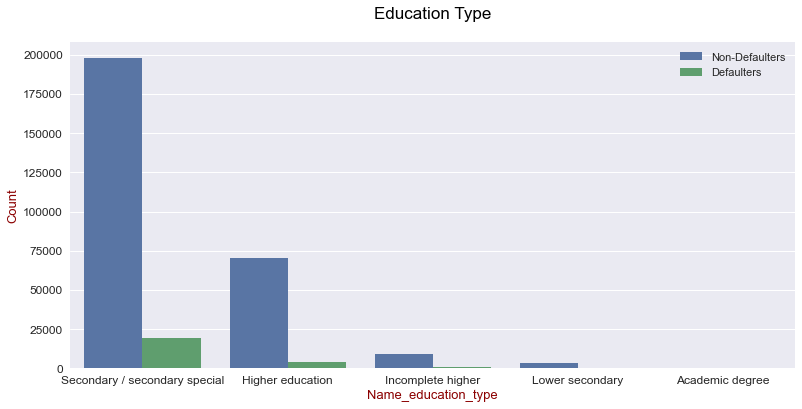

In [79]:
plt.figure(figsize=(13,6))
countplot(currentApplication,'NAME_EDUCATION_TYPE','TARGET')
set_title('Education Type\n');

In [80]:
#calculating defaults percentage in NAME_EDUCATION_TYPE
defaulters_perc(currentApplication,'NAME_EDUCATION_TYPE')

,NAME_EDUCATION_TYPE,Default_Percentage
3,Lower secondary,10.95
0,Secondary / secondary special,8.95
2,Incomplete higher,8.50
1,Higher education,5.36
4,Academic degree,1.84


**Inference**

Secondary education type are likely to default as per total population whereas applicants with lower secondary type of education seems to be at risk of default on same count percentage basis.

### Own Car and Realty

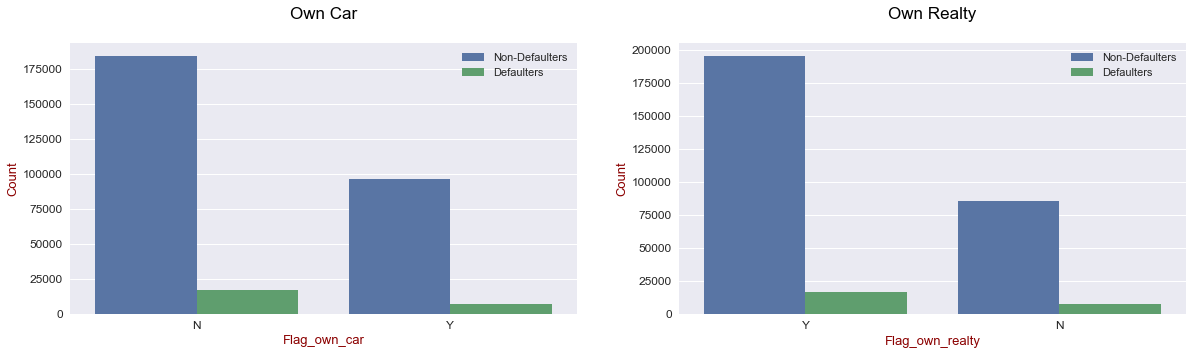

In [81]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax=countplot(currentApplication,'FLAG_OWN_CAR','TARGET')
set_title('Own Car\n')

plt.subplot(1,2,2)
ax=countplot(currentApplication,'FLAG_OWN_REALTY','TARGET')
set_title('Own Realty\n')

In [82]:
#calculating defaults percentage in FLAG_OWN_CAR
defaulters_perc(currentApplication,'FLAG_OWN_CAR')

,FLAG_OWN_CAR,Default_Percentage
0,N,8.51
1,Y,7.26


In [83]:
#calculating defaults percentage in FLAG_OWN_REALTY
defaulters_perc(currentApplication,'FLAG_OWN_REALTY')

,FLAG_OWN_REALTY,Default_Percentage
1,N,8.36
0,Y,7.96


**Inference**

- Applicants who doesn't own car are likely to default.
- Applicants who have own realty are likely to default same with a variation of less than 1% with same count analysis.

### Loan Type

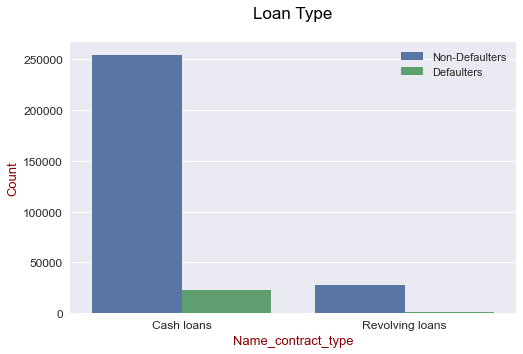

In [84]:
plt.figure(figsize=(8,5))

countplot(currentApplication,'NAME_CONTRACT_TYPE','TARGET')
set_title('Loan Type\n')

In [85]:
#calculating defaults percentage in NAME_CONTRACT_TYPE
defaulters_perc(currentApplication,'NAME_CONTRACT_TYPE')

,NAME_CONTRACT_TYPE,Default_Percentage
0,Cash loans,8.36
1,Revolving loans,5.46


**Inference**

- Its the cash loan which is noticed with more likely to default in both comparision.

### Region Rating

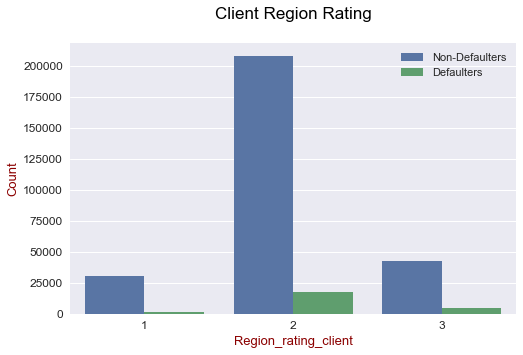

In [86]:
plt.figure(figsize=(8,5))

countplot(currentApplication,'REGION_RATING_CLIENT','TARGET')
set_title('Client Region Rating\n')

In [87]:
#calculating defaults percentage in REGION_RATING_CLIENT
defaulters_perc(currentApplication,'REGION_RATING_CLIENT')

,REGION_RATING_CLIENT,Default_Percentage
2,3.0,11.13
0,2.0,7.90
1,1.0,4.83


**Inference**

- Applicants with region rating 2 are more in number compared to other region ratings.
- Rating 3 holds highest defaulters in default percentage of same count.

### Credit Vs Total Income

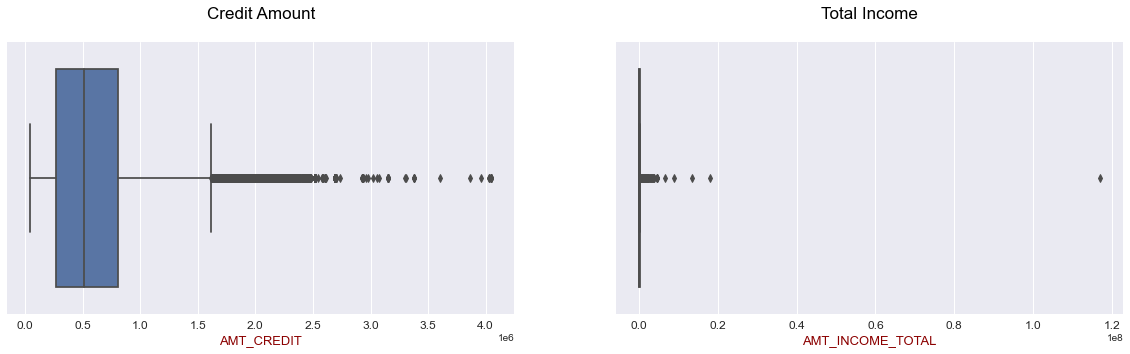

In [88]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = boxplot(currentApplication,'AMT_CREDIT')
set_title('Credit Amount\n')

plt.subplot(1,2,2)
ax = boxplot(currentApplication,'AMT_INCOME_TOTAL')
set_title('Total Income\n');


Its clear from above subplots that the outliers exists in both credit and total income attributes. Lets treat it with percentile approach.

In [89]:
curr_amt_credit = currentApplication[currentApplication['AMT_CREDIT']<np.nanpercentile(currentApplication['AMT_CREDIT'],99)]
curr_inc_total = currentApplication[currentApplication['AMT_INCOME_TOTAL']<np.nanpercentile(currentApplication['AMT_INCOME_TOTAL'],99)]

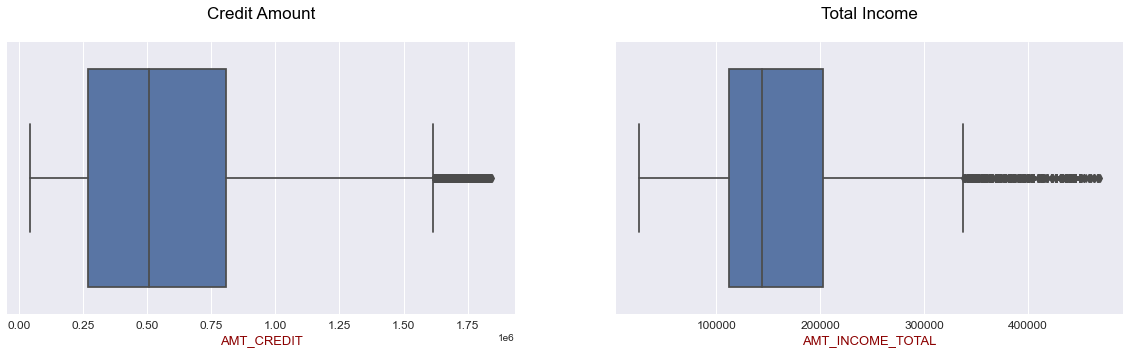

In [90]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = boxplot(curr_amt_credit,'AMT_CREDIT')
set_title('Credit Amount\n')

plt.subplot(1,2,2)
ax = boxplot(curr_inc_total,'AMT_INCOME_TOTAL')
set_title('Total Income\n');


With the continuous variables above, we can proceed with scatter plot.

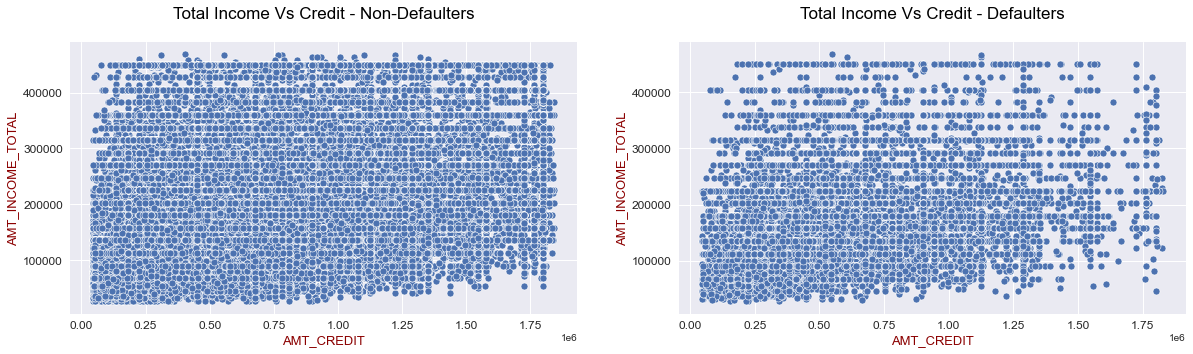

In [91]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax=scatterplot(curr_amt_credit,curr_inc_total,'AMT_CREDIT','AMT_INCOME_TOTAL','TARGET',0)
set_title('Total Income Vs Credit - Non-Defaulters\n')

plt.subplot(1,2,2)
ax=scatterplot(curr_amt_credit,curr_inc_total,'AMT_CREDIT','AMT_INCOME_TOTAL','TARGET',1)
set_title('Total Income Vs Credit - Defaulters\n');


**Inference**

- Number of defaulters are more even for lesser amount of credit
- Defaulters are less for higher total income

### Goods Price Vs Credit Amount

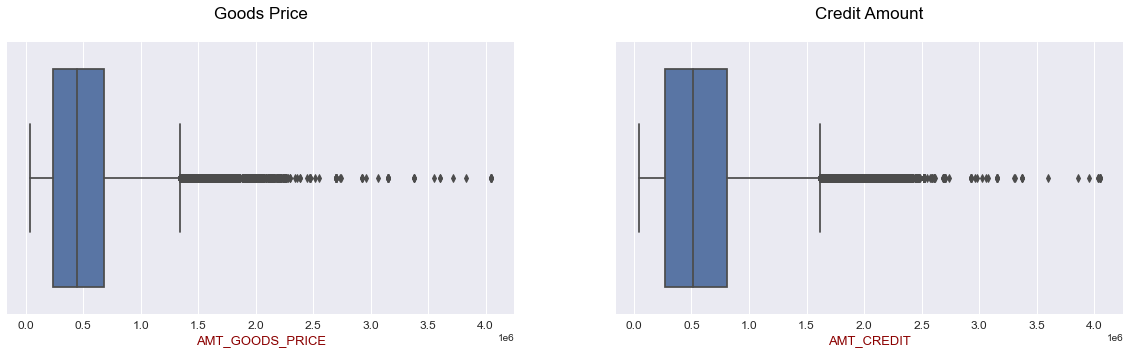

In [92]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = boxplot(currentApplication,'AMT_GOODS_PRICE')
set_title('Goods Price\n')

plt.subplot(1,2,2)
ax = boxplot(currentApplication,'AMT_CREDIT')
set_title('Credit Amount\n');

From above subplots, it is clear that the outliers exists in both credit and goods price attributes. Lets treat it with percentile approach.

In [93]:
curr_goods_price = currentApplication[currentApplication['AMT_GOODS_PRICE']<np.nanpercentile(currentApplication['AMT_GOODS_PRICE'],99)]

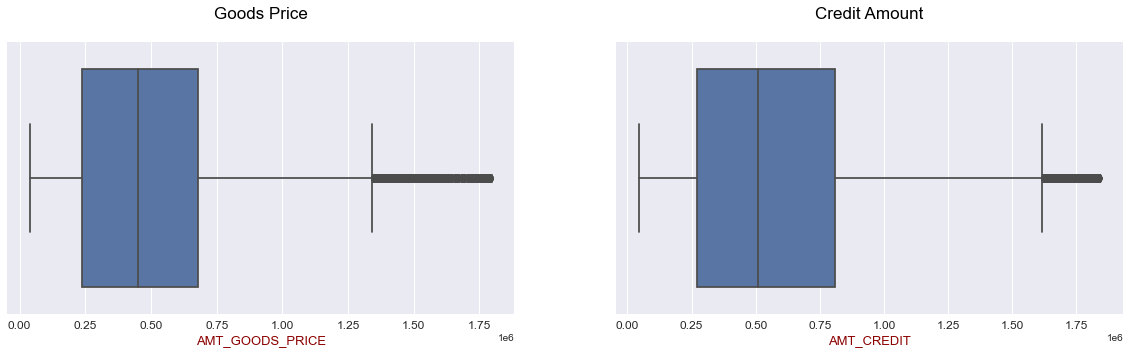

In [94]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = boxplot(curr_goods_price,'AMT_GOODS_PRICE')
set_title('Goods Price\n')

plt.subplot(1,2,2)
ax = boxplot(curr_amt_credit,'AMT_CREDIT')
set_title('Credit Amount\n');


With the continuous variables above, we can proceed with scatter plot.

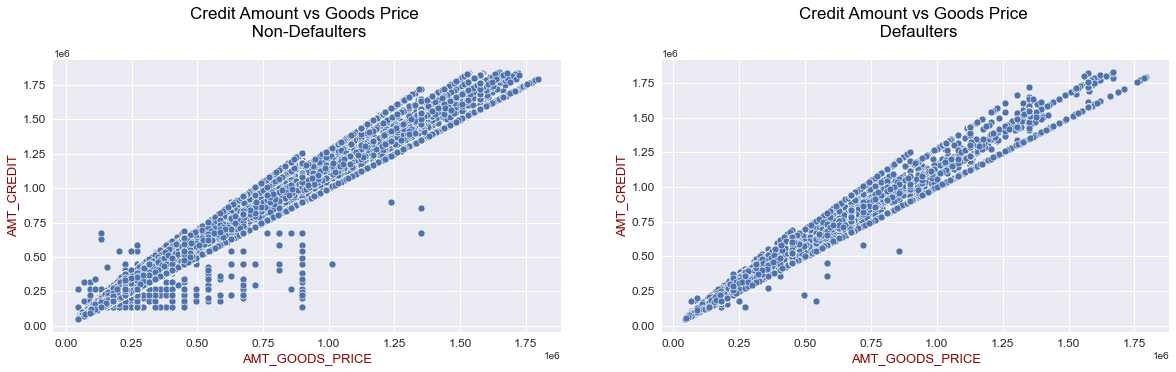

In [95]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax=scatterplot(curr_goods_price,curr_amt_credit,'AMT_GOODS_PRICE','AMT_CREDIT','TARGET',0)
set_title('Credit Amount vs Goods Price \n Non-Defaulters\n')

plt.subplot(1,2,2)
ax=scatterplot(curr_goods_price,curr_amt_credit,'AMT_GOODS_PRICE','AMT_CREDIT','TARGET',1)
set_title('Credit Amount vs Goods Price \n Defaulters\n');


**Inference**

- With above plots, its clear that there is linear positive co-relation between Good price and Credit Amount.
- Number of defaulters are less with the rise in credit amount as well as goods price.
- With respect to non-defaulters, the count is more with rise in goods price.

### Credit vs Annuity

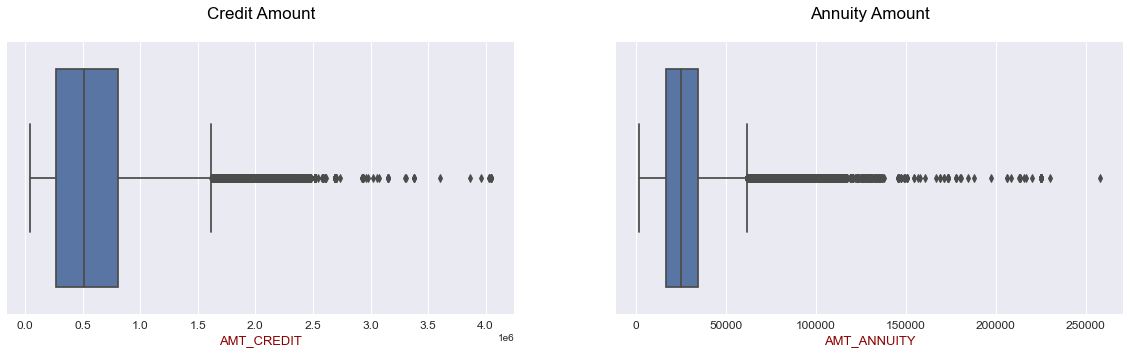

In [96]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = boxplot(currentApplication,'AMT_CREDIT')
set_title('Credit Amount\n')

plt.subplot(1,2,2)
ax = boxplot(currentApplication,'AMT_ANNUITY')
set_title('Annuity Amount\n');


In [97]:
curr_annuity = currentApplication[currentApplication['AMT_ANNUITY']<np.nanpercentile(currentApplication['AMT_ANNUITY'],99)]

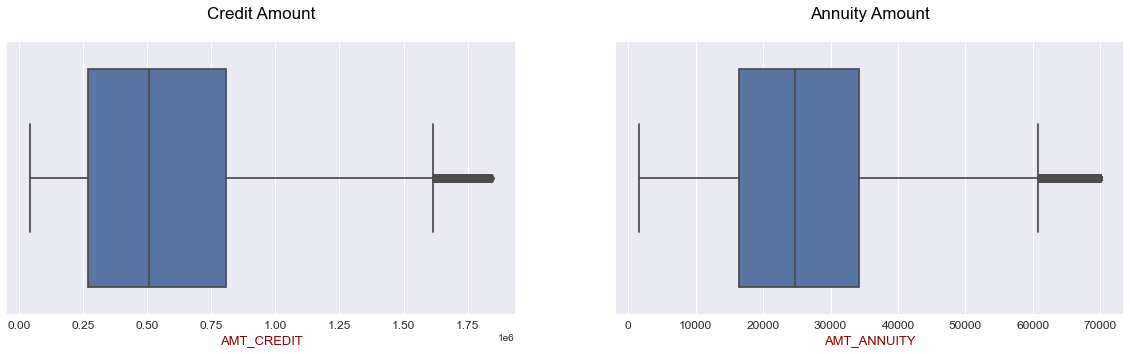

In [98]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = boxplot(curr_amt_credit,'AMT_CREDIT')
set_title('Credit Amount\n')

plt.subplot(1,2,2)
ax = boxplot(curr_annuity,'AMT_ANNUITY')
set_title('Annuity Amount\n');


With the continuous variables above, we can proceed with scatter plot.

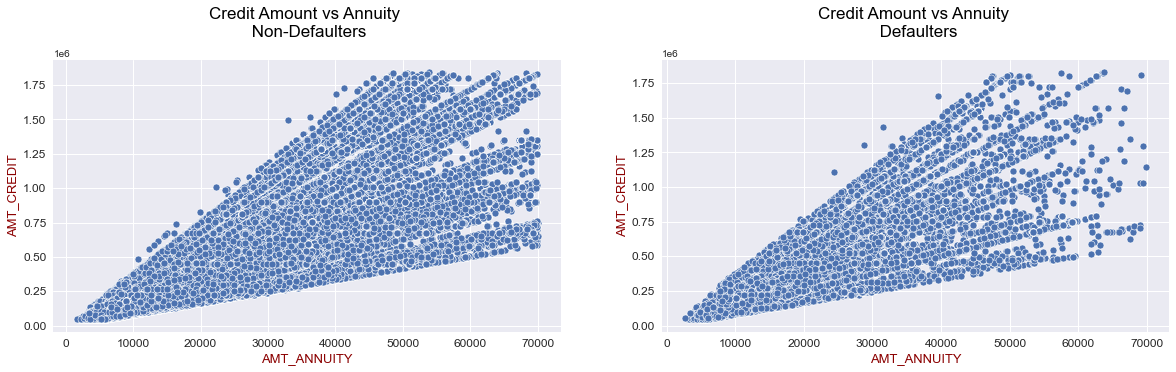

In [99]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax=scatterplot(curr_annuity,curr_amt_credit,'AMT_ANNUITY','AMT_CREDIT','TARGET',0)
set_title('Credit Amount vs Annuity \n Non-Defaulters\n')

plt.subplot(1,2,2)
ax=scatterplot(curr_annuity,curr_amt_credit,'AMT_ANNUITY','AMT_CREDIT','TARGET',1)
set_title('Credit Amount vs Annuity \n Defaulters\n');


**Inference**

- With above plots, its clear that there is linear positive co-relation between Annuity and Credit Amount.
- Number of defaulters are less with the rise in credit amount as well as annuity.
- With respect to non-defaulters, the count is more with rise in annuity.

### Family Status and Housing Type

Identify the various combinations of type of Family statuses and housing types

In [100]:
currentApplication[['NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']].head()

,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,Single / not married,House / apartment
1,Married,House / apartment
2,Single / not married,House / apartment
3,Civil marriage,House / apartment
4,Single / not married,House / apartment


In [101]:
house_fam_check=pd.DataFrame(currentApplication.groupby(['NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','TARGET'])['NAME_HOUSING_TYPE'].count())
house_fam_check=house_fam_check.rename(columns={'NAME_HOUSING_TYPE': 'Count_house_type'})
house_fam_check.head()

Count_house_type
NAME_FAMILY_STATUS NAME_HOUSING_TYPE   TARGET                  
Civil marriage     Co-op apartment     0                     69
                                       1                      5
                   House / apartment   0                  23451
                                       1                   2503
                   Municipal apartment 0                   1053

In [102]:
house_fam_check.reset_index(level=['NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','TARGET'],inplace=True)
house_fam_check.head()

,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,TARGET,Count_house_type
0,Civil marriage,Co-op apartment,0,69
1,Civil marriage,Co-op apartment,1,5
2,Civil marriage,House / apartment,0,23451
3,Civil marriage,House / apartment,1,2503
4,Civil marriage,Municipal apartment,0,1053


In [103]:
house_fam_defaults=house_fam_check[house_fam_check['TARGET']==1]
house_fam_defaults.head()

,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,TARGET,Count_house_type
1,Civil marriage,Co-op apartment,1,5
3,Civil marriage,House / apartment,1,2503
5,Civil marriage,Municipal apartment,1,122
7,Civil marriage,Office apartment,1,22
9,Civil marriage,Rented apartment,1,84


In [104]:
house_fam_defaults['FAM_HOUSE']=house_fam_defaults['NAME_FAMILY_STATUS']+" / "+house_fam_defaults['NAME_HOUSING_TYPE']
house_fam_defaults.head()

,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,TARGET,Count_house_type,FAM_HOUSE
1,Civil marriage,Co-op apartment,1,5,Civil marriage / Co-op apartment
3,Civil marriage,House / apartment,1,2503,Civil marriage / House / apartment
5,Civil marriage,Municipal apartment,1,122,Civil marriage / Municipal apartment
7,Civil marriage,Office apartment,1,22,Civil marriage / Office apartment
9,Civil marriage,Rented apartment,1,84,Civil marriage / Rented apartment


In [105]:
house_fam_defaults.sort_values(by='Count_house_type',ascending=False,inplace=True)
house_fam_defaults.head()

,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,TARGET,Count_house_type,FAM_HOUSE
15,Married,House / apartment,1,13082,Married / House / apartment
39,Single / not married,House / apartment,1,3436,Single / not married / House / apartment
3,Civil marriage,House / apartment,1,2503,Civil marriage / House / apartment
27,Separated,House / apartment,1,1339,Separated / House / apartment
51,Widow,House / apartment,1,853,Widow / House / apartment


In [106]:
house_fam_defaults.shape

(30, 5)

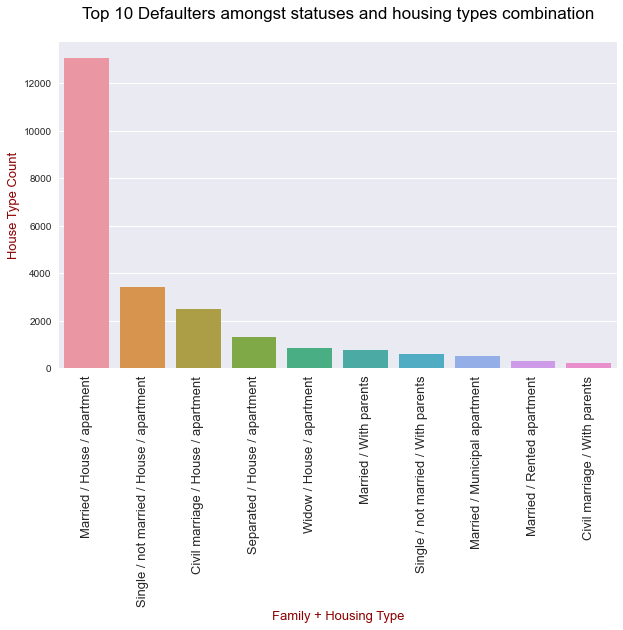

In [107]:
plt.figure(figsize=(10,6))
sns.barplot(data=house_fam_defaults.head(10),x='FAM_HOUSE',y='Count_house_type')
set_title('Top 10 Defaulters amongst statuses and housing types combination\n')
set_label('x','Family + Housing Type')
set_label('y','House Type Count')
plt.xticks(rotation=90,fontsize=13);

In [108]:
defaulters_perc(currentApplication,'NAME_FAMILY_STATUS')

,NAME_FAMILY_STATUS,Default_Percentage
2,Civil marriage,9.96
0,Single / not married,9.84
4,Separated,8.21
1,Married,7.57
3,Widow,5.84


In [109]:
defaulters_perc(currentApplication,'NAME_HOUSING_TYPE')

,NAME_HOUSING_TYPE,Default_Percentage
1,Rented apartment,12.32
2,With parents,11.72
3,Municipal apartment,8.54
5,Co-op apartment,8.00
0,House / apartment,7.81
4,Office apartment,6.53


**Inference**

- Married and residing in house / apartment are highest likely to default high.
- Civil marriages are highest amongst more likely to default as per the count of same type.
- House / apartment are noticed less likely to default when considered individually.

### Family Head Count

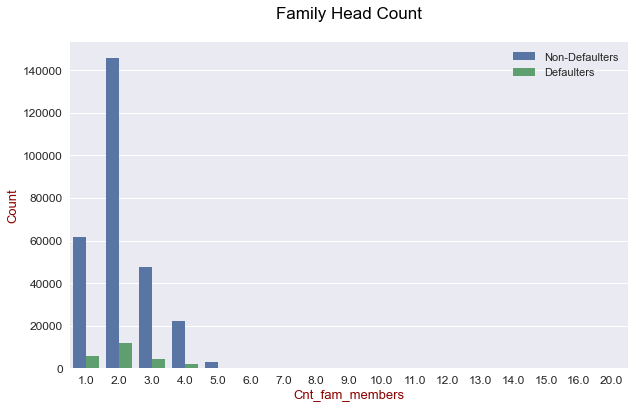

In [110]:
plt.figure(figsize=(10,6))
countplot(currentApplication,'CNT_FAM_MEMBERS','TARGET')
set_title('Family Head Count\n');

In [111]:
df=defaulters_perc(currentApplication,'CNT_FAM_MEMBERS')
df[df['Default_Percentage']>10]

,CNT_FAM_MEMBERS,Default_Percentage
16,11.0,100.00
10,13.0,100.00
9,10.0,33.33
8,8.0,30.00
5,6.0,13.51


**Inference**

- Families with more than 5 members are more likely to default.

### Distribution by Age

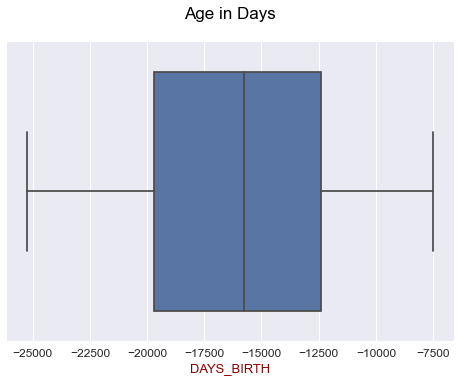

In [112]:
boxplot(currentApplication,'DAYS_BIRTH')
set_title('Age in Days\n');

Taking the absolute values will provide days in positive count.

In [113]:
currentApplication['AGE']=currentApplication.DAYS_BIRTH.apply(lambda x: round(abs(x/365)))
currentApplication.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55


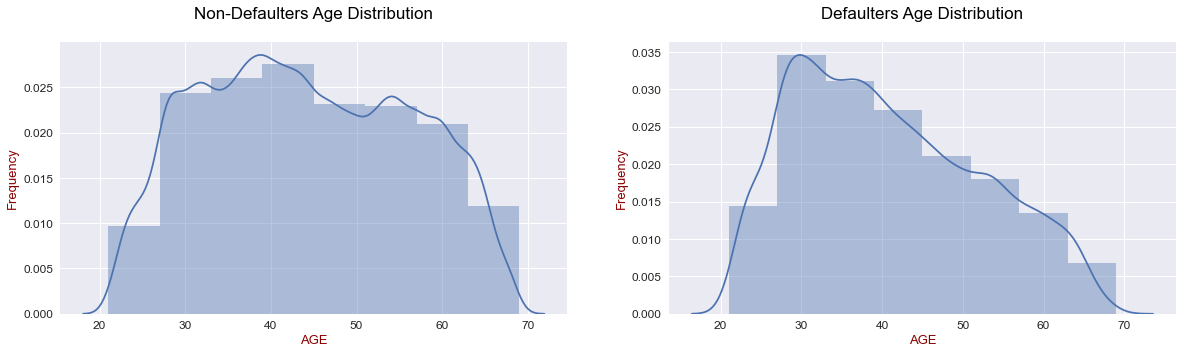

In [114]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax=distplot(currentApplication,'AGE','TARGET',0)
set_title('Non-Defaulters Age Distribution\n')

plt.subplot(1,2,2)
ax=distplot(currentApplication,'AGE','TARGET',1)
set_title('Defaulters Age Distribution\n')

**Inference**

- Applicants between age grouped within 30 - 40 are more likely to default.
- Applicants trend decreases with increase in age for defaulters.

## Top 10 correlation for the Client with payment difficulties and all other cases

### Defaulters

In [115]:
default = currentApplication[currentApplication['TARGET']==1].drop('TARGET',axis=1)

In [116]:
defaulter = round(default.corr().unstack(),2)
defaulter.sort_values(ascending=False).drop_duplicates().head(10)

SK_ID_CURR                    SK_ID_CURR                     1.00
FLOORSMAX_MODE                FLOORSMAX_MEDI                 0.99
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG    0.98
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT           0.96
CNT_CHILDREN                  CNT_FAM_MEMBERS                0.89
DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE       0.87
LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION     0.85
REG_CITY_NOT_WORK_CITY        LIVE_CITY_NOT_WORK_CITY        0.78
AMT_CREDIT                    AMT_ANNUITY                    0.75
FLOORSMAX_AVG                 TOTALAREA_MODE                 0.64
dtype: float64

### Non-Defaulters

In [117]:
non_default = currentApplication[currentApplication['TARGET']==0].drop('TARGET',axis=1)
non_defaulter = round(default.corr().unstack(),2)
non_defaulter.sort_values(ascending=False).drop_duplicates().head(10)

SK_ID_CURR                    SK_ID_CURR                     1.00
FLOORSMAX_MODE                FLOORSMAX_MEDI                 0.99
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG    0.98
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT           0.96
CNT_CHILDREN                  CNT_FAM_MEMBERS                0.89
DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE       0.87
LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION     0.85
REG_CITY_NOT_WORK_CITY        LIVE_CITY_NOT_WORK_CITY        0.78
AMT_CREDIT                    AMT_ANNUITY                    0.75
FLOORSMAX_AVG                 TOTALAREA_MODE                 0.64
dtype: float64